In [2]:
print("Hello Wolrd!")

Hello Wolrd!


In [3]:
import pandas as pd


In [4]:

# Load the data
df = pd.read_csv('retail_price.csv')

In [5]:
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

## Step 1: Data Cleaning & Preparation

In [5]:
# Convert month_year to datetime
df['date'] = pd.to_datetime(df['month_year'], format='%d-%m-%Y')


In [6]:
#Drop Redundant Columns
df.drop(['month_year', 'month', 'year'], axis=1, inplace=True)


In [7]:
# Reorder Columns
df = df.sort_values('date')
df.set_index('date', inplace=True)  # Useful for time series


In [8]:
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 676 entries, 2017-01-01 to 2018-08-01
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   qty                         676 non-null    int64  
 3   total_price                 676 non-null    float64
 4   freight_price               676 non-null    float64
 5   unit_price                  676 non-null    float64
 6   product_name_lenght         676 non-null    int64  
 7   product_description_lenght  676 non-null    int64  
 8   product_photos_qty          676 non-null    int64  
 9   product_weight_g            676 non-null    int64  
 10  product_score               676 non-null    float64
 11  customers                   676 non-null    int64  
 12  weekday                     676 non-null    int64  
 13  weekend         

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 676 entries, 2017-01-01 to 2018-08-01
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   qty                         676 non-null    int64  
 3   total_price                 676 non-null    float64
 4   freight_price               676 non-null    float64
 5   unit_price                  676 non-null    float64
 6   product_name_lenght         676 non-null    int64  
 7   product_description_lenght  676 non-null    int64  
 8   product_photos_qty          676 non-null    int64  
 9   product_weight_g            676 non-null    int64  
 10  product_score               676 non-null    float64
 11  customers                   676 non-null    int64  
 12  weekday                     676 non-null    int64  
 13  weekend         

## Step 2: Exploratory Data Analysis (EDA)

In [12]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
qty,676.0,14.495562,15.443421,1.000000,4.000000,10.000000,18.000000,122.00
total_price,676.0,1422.708728,1700.123100,19.900000,333.700000,807.890000,1887.322500,12095.00
freight_price,676.0,20.682270,10.081817,0.000000,14.761912,17.518472,22.713558,79.76
unit_price,676.0,106.496800,76.182972,19.900000,53.900000,89.900000,129.990000,364.00
product_name_lenght,676.0,48.720414,9.420715,29.000000,40.000000,51.000000,57.000000,60.00
product_description_lenght,676.0,767.399408,655.205015,100.000000,339.000000,501.000000,903.000000,3006.00
product_photos_qty,676.0,1.994083,1.420473,1.000000,1.000000,1.500000,2.000000,8.00
product_weight_g,676.0,1847.498521,2274.808483,100.000000,348.000000,950.000000,1850.000000,9750.00
product_score,676.0,4.085503,0.232021,3.300000,3.900000,4.100000,4.200000,4.50
customers,676.0,81.028107,62.055560,1.000000,34.000000,62.000000,116.000000,339.00


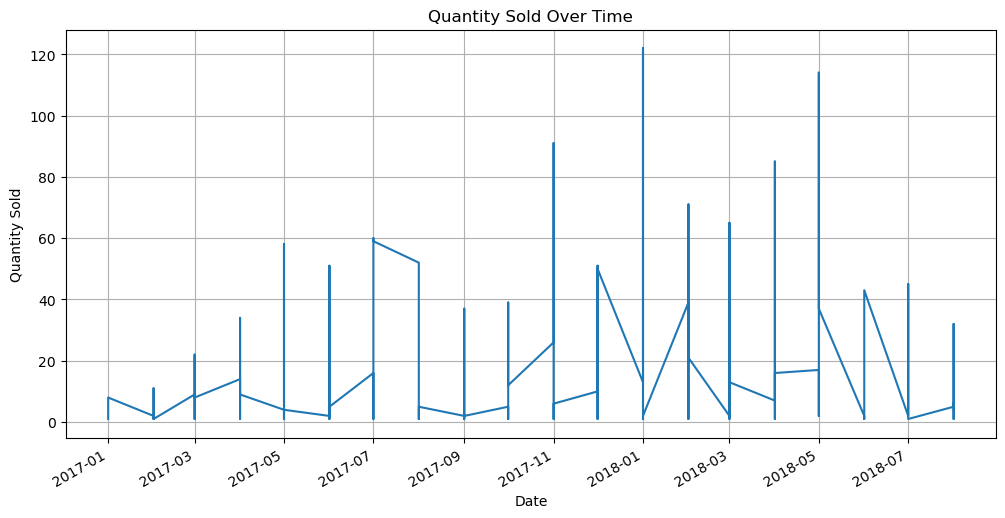

In [13]:
# Visualize Quantity Sold Over Time
#Top product categories by total quantity sold
import matplotlib.pyplot as plt

df['qty'].plot (figsize=(12,6), title='Quantity Sold Over Time')
plt.xlabel("Date")
plt.ylabel("Quantity Sold")
plt.grid(True)
plt.show()


<Axes: title={'center': 'Total Quantity Sold by Product Category'}, xlabel='product_category_name'>

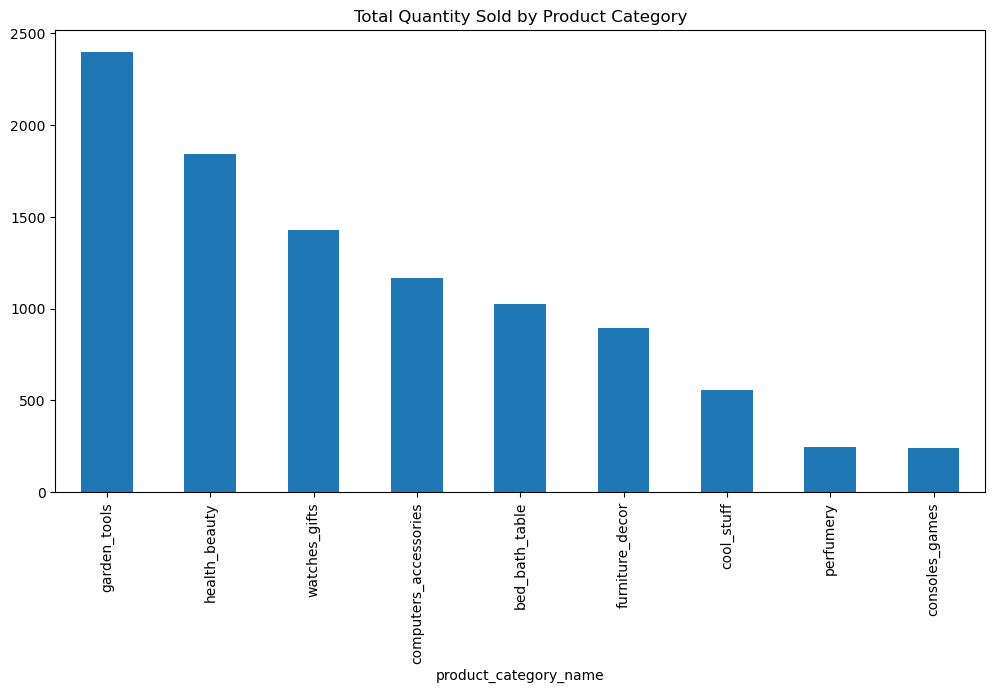

In [14]:
# Product-Level Analysis
#Top product categories by total quantity sold:
df.groupby('product_category_name')['qty'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(12,6), title='Total Quantity Sold by Product Category')


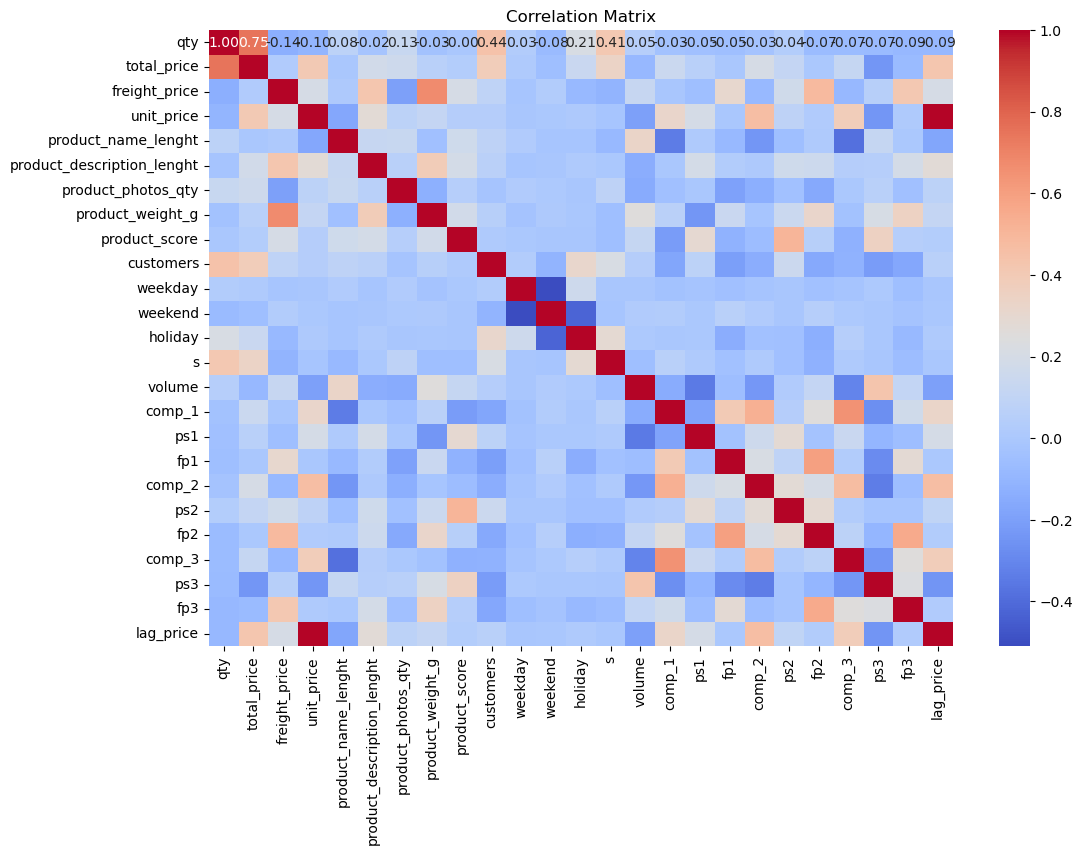

'Especially check correlations with:\nunit_price\nfreight_price\nholiday, weekend, product_score, comp_1, lag_price, etc.\n'

In [15]:
#Correlation Analysis
#See how different features relate to sales (qty).
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


"""Especially check correlations with:
unit_price
freight_price
holiday, weekend, product_score, comp_1, lag_price, etc.
"""

<Axes: title={'center': 'Average Quantity Sold by Weekday'}, xlabel='date'>

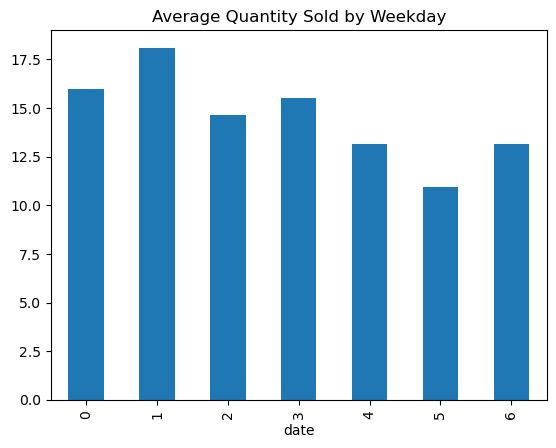

In [16]:
# Seasonality / Temporal Patterns
#Break down by month or weekday:
df.groupby(df.index.weekday)['qty'].mean().plot(kind='bar', title='Average Quantity Sold by Weekday')


<Axes: title={'center': 'Average Quantity Sold by Month'}, xlabel='date'>

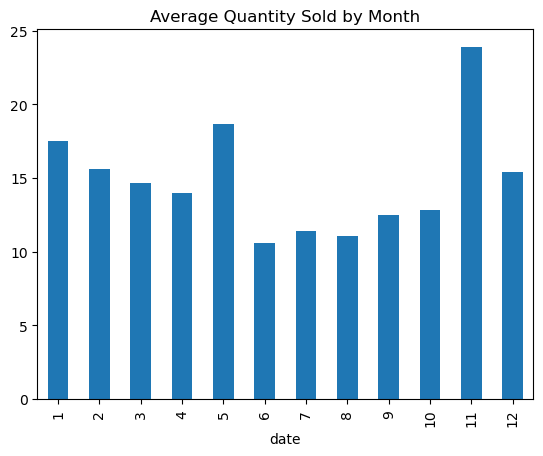

In [17]:
df.groupby(df.index.month)['qty'].mean().plot(kind='bar', title='Average Quantity Sold by Month')

## Lag & Competitor Effects Analysis 

✅ Lag Effect Analysis (Lag Price → Sales)

Goal:
To determine how previous prices (lag_price) influence current sales volume (qty).

Why it matters:

Customer memory & behavior: Shoppers may remember previous prices and delay or accelerate their purchase decisions.

Pricing strategy: If high past prices reduce current sales, you may need to optimize price timing to avoid demand drops.

Helps model delayed responses in time series.

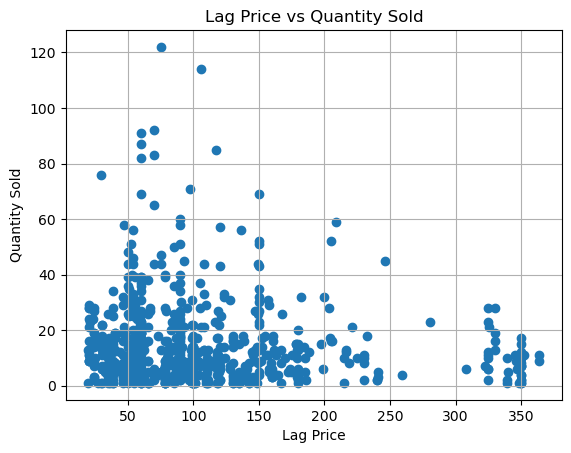

In [18]:
# Lag Effect
#Plot lag price vs current qty to see delayed price effect

plt.scatter(df['lag_price'], df['qty'])
plt.xlabel("Lag Price")
plt.ylabel("Quantity Sold")
plt.title("Lag Price vs Quantity Sold")
plt.grid(True)
plt.show()

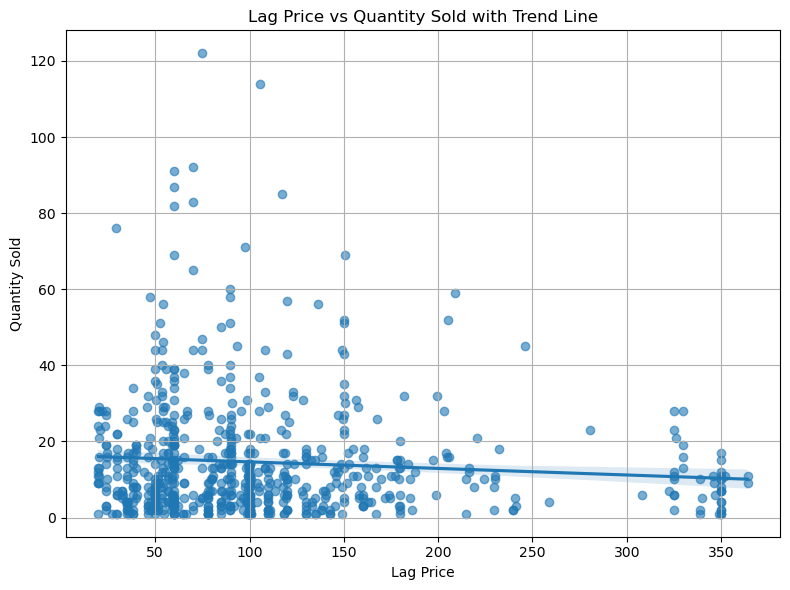

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot with trend line
plt.figure(figsize=(8, 6))
sns.regplot(x='lag_price', y='qty', data=df, scatter_kws={'alpha':0.6})
plt.xlabel("Lag Price")
plt.ylabel("Quantity Sold")
plt.title("Lag Price vs Quantity Sold with Trend Line")
plt.grid(True)
plt.tight_layout()
plt.show()


Slight Negative Trend:

The trend line slopes slightly downward, indicating a very weak negative correlation.

Interpretation: As lagged prices increase, there is a slight tendency for current quantity sold to decrease.

Your scatterplot with trend line shows that as lag_price increases, quantity tends to slightly decrease, indicating negative lag effect.



✅ 🛒 2. Competitor Effect Analysis (Competitor Prices → Your Sales)

Goal:
To understand if competitor prices (comp_1, comp_2, comp_3) are impacting your own product sales.

Why it matters:

Price competition: If your competitors lower prices, you might see a drop in your own sales.

Helps assess market sensitivity to rivals' pricing and quality (product scores).

Enables smarter competitive pricing strategy to retain or grow market share.


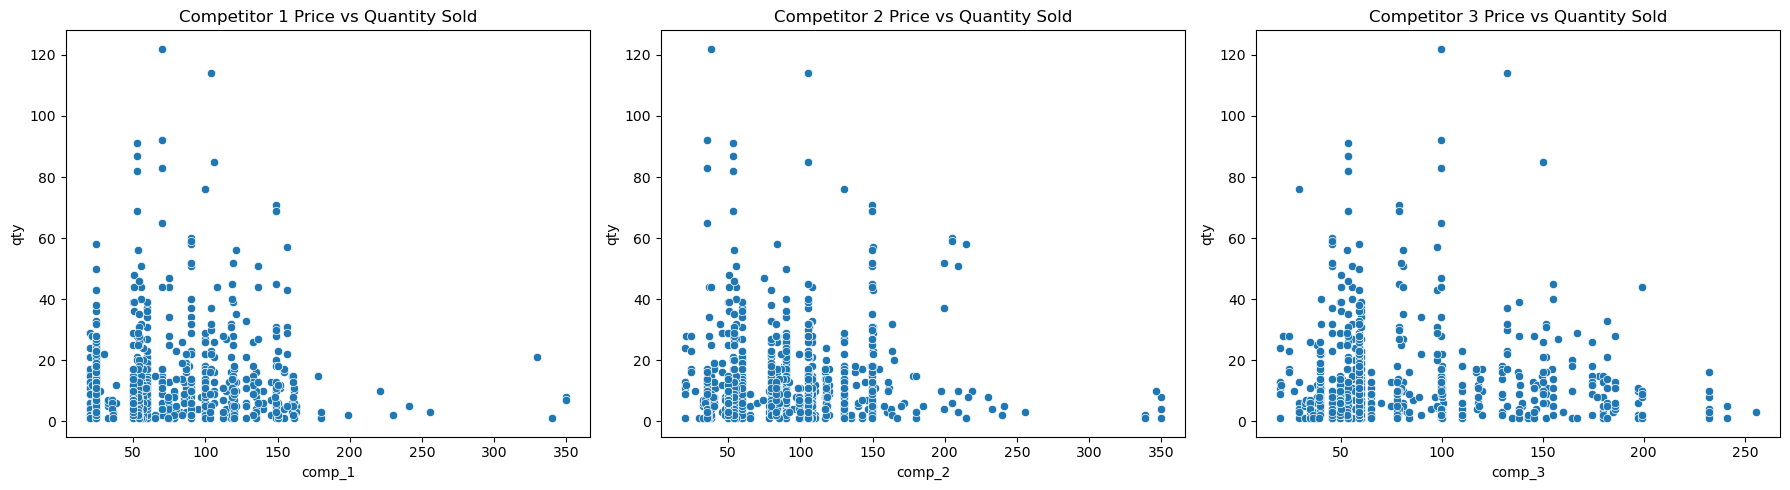

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot own price vs competitor prices
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(x='comp_1', y='qty', data=df, ax=ax[0])
ax[0].set_title('Competitor 1 Price vs Quantity Sold')

sns.scatterplot(x='comp_2', y='qty', data=df, ax=ax[1])
ax[1].set_title('Competitor 2 Price vs Quantity Sold')

sns.scatterplot(x='comp_3', y='qty', data=df, ax=ax[2])
ax[2].set_title('Competitor 3 Price vs Quantity Sold')

plt.tight_layout()
plt.show()


🔍 Interpretation: Competitor Price vs Quantity Sold

Each subplot shows the relationship between a competitor's price and our quantity sold (qty).

📊 Left Plot: comp_1 vs qty
Observation: There is a slight downward trend — when comp_1's price increases, our sales don’t increase significantly.

Insight: Your product may not be very price-sensitive to comp_1. The relationship is weak or neutral.

📊 Middle Plot: comp_2 vs qty
Observation: A similar pattern as comp_1 — data is widely scattered, with little evidence that comp_2’s price directly impacts our sales volume.

Insight: This might mean our product is in a different market niche or comp_2 is not our direct competitor.

📊 Right Plot: comp_3 vs qty
Observation: Again, the data shows no strong inverse or positive trend.

Insight: There’s likely low cross-price elasticity between our product and comp_3’s price.



In [21]:
df[['qty', 'comp_1', 'comp_2', 'comp_3']].corr()


,qty,comp_1,comp_2,comp_3
qty,1.000000,-0.033570,-0.027044,-0.068522
comp_1,-0.033570,1.000000,0.532859,0.650433
comp_2,-0.027044,0.532859,1.000000,0.472245
comp_3,-0.068522,0.650433,0.472245,1.000000


📊 Interpretation of Correlation Matrix

| Variable Pair        | Correlation | Interpretation                                                              |
| -------------------- | ----------- | --------------------------------------------------------------------------- |
| `qty` vs `comp_1`    | -0.03       | Very weak negative — **almost no impact**                                   |
| `qty` vs `comp_2`    | -0.03       | Same — **negligible relationship**                                          |
| `qty` vs `comp_3`    | -0.07       | Still weak, slightly more negative, but **not meaningful**                  |
| `comp_1` vs `comp_2` | 0.53        | Moderate positive — **some overlap in pricing strategies**                  |
| `comp_1` vs `comp_3` | 0.65        | Stronger relationship — these two may **belong to similar segments**        |
| `comp_2` vs `comp_3` | 0.47        | Moderate correlation — again, **some connection** between these competitors |


✅ Key Takeaways

Your quantity sold (qty) is not significantly correlated with any of the competitor prices.

The competitors are moderately correlated with each other, suggesting they may adjust prices similarly (shared market forces).

These weak correlations confirm what we saw in the scatter plots — competitor pricing has limited direct impact on your sales volume.



## Feature Engineering

In [9]:
# 1. price_diff — difference between your product's price and the average competitor price
df['comp_avg'] = df[['comp_1', 'comp_2', 'comp_3']].mean(axis=1)
df['price_diff'] = df['unit_price'] - df['comp_avg']


In [10]:
# 2. is_discounted — flag if current price is lower than previous period (lag price)

df['is_discounted'] = (df['unit_price'] < df['lag_price']).astype(int)

In [11]:
#3. freight_ratio — proportion of freight in total cost

df['freight_ratio'] = df['freight_price'] / df['total_price']

In [12]:
df.to_csv('processed_retail_data.csv', index=False)

## Step: Feature Importance Analysis

✅ Objective:

Use a model (like Random Forest) to determine which features most strongly impact sales.

1. Prepare the Data

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define features and target
X = df.drop(columns=["qty"])  # target column
y = df['qty']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


2. Train a Random Forest Regressor

In [26]:
# Step 3: Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

3. Plot Feature Importance

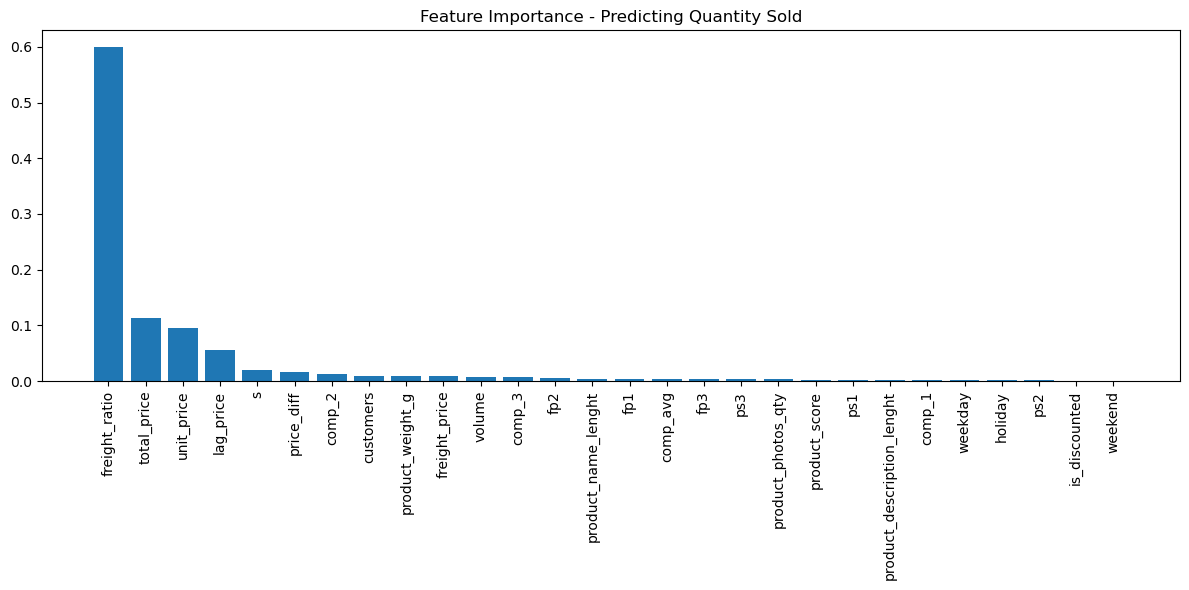

In [27]:
# Step 4: Plot feature importances
importances = rf.feature_importances_
feature_names = X.columns
indices = importances.argsort()[::-1]

# Plot
plt.figure(figsize=(12, 6))
plt.title("Feature Importance - Predicting Quantity Sold")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


Top Features Driving Sales
| Rank | Feature         | Interpretation                                                                                                                  |
| ---- | --------------- | ------------------------------------------------------------------------------------------------------------------------------- |
| 1️⃣  | `freight_ratio` | 🚚 Most powerful predictor — high shipping cost relative to price discourages purchases. Reflects cost-efficiency of the order. |
| 2️⃣  | `total_price`   | 💰 Strong driver — often linked to bulk purchases, since `qty * unit_price = total_price`.                                      |
| 3️⃣  | `unit_price`    | 🔻 Lower unit prices can attract more buyers — clear price sensitivity effect.                                                  |
| 4️⃣  | `lag_price`     | 🕒 Price in the previous period still impacts current sales — captures delayed consumer response or expectations.               |
| 5️⃣  | `s`             | 📊 Still relevant — possibly a derived or seasonal feature (e.g., stock level or sales velocity).                               |
| 6️⃣  | `price_diff`    | 🏷️ Difference from competitors — indicates if you're under- or over-pricing compared to market, which influences sales.        |


📈 Narrative Summary: What Drives Product Sales?

Our feature importance analysis reveals key factors influencing product sales performance:

Freight Ratio emerged as the strongest predictor of quantity sold. This metric captures the cost efficiency of shipping relative to price. High freight costs compared to product price tend to discourage purchases, suggesting that optimizing delivery cost structures could boost sales.

Total Price is another major driver. Since total price reflects both the quantity sold and unit price, higher values typically indicate bulk buying behavior. Customers making large purchases naturally contribute more to overall sales volume.

Unit Price shows clear price sensitivity. Lower unit prices tend to lead to higher quantities sold, indicating that customers respond well to competitive pricing.

Lag Price shows that past pricing decisions influence current sales — perhaps due to customer expectations or price comparisons over time.

Variable s, likely related to sales trends or product availability, continues to carry predictive weight and may capture seasonal or operational effects.

Price Difference (price_diff) reflects the gap between our pricing and the average competitor pricing. Products priced below competitors are more likely to be sold, confirming the value of strategic price positioning.



💡 Minor or Negligible Features

Most of the other features (competitor prices, product details, holiday, weekday, etc.) have very low importance, suggesting they contribute little to the prediction relative to price-related features.



🧠 Insights

Sales are heavily driven by pricing and direct transaction attributes.

Competitor prices have minimal influence — perhaps customers are not very price-comparative.

Product features (weight, photos, etc.) have negligible effect, indicating they don’t vary much or don’t matter in this product category.

Temporal/holiday effects seem minimal — might be due to uniform demand or low sensitivity.



## Model Training & Evaluation

Objective: Build and assess models that predict quantity sold (qty) based on engineered features.

## With Pipeline

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
import joblib

# Define categorical and numerical columns
categorical_cols = ['product_category_name']  # categorical columns
numerical_cols = [col for col in X.columns if col not in categorical_cols + ['product_id']]

# Ensure numerical columns are numeric type in X_train
for col in numerical_cols:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')  # convert to numeric, set invalid to NaN

# Optional: Imputer for numerical columns (fill missing values)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # fill NaN with mean
    ('scaler', StandardScaler())                   # scale numerical features
])

# Preprocessor for categorical columns
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Full pipeline with preprocessor and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Save the pipeline to a file
joblib.dump(pipeline, 'sales_pipeline.pkl')


In [18]:
## WithOUT Pipeline

In [28]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X = df.drop(columns=["qty"])  # Features
y = df["qty"]                 # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 676 entries, 2017-01-01 to 2018-08-01
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   total_price                 676 non-null    float64
 3   freight_price               676 non-null    float64
 4   unit_price                  676 non-null    float64
 5   product_name_lenght         676 non-null    int64  
 6   product_description_lenght  676 non-null    int64  
 7   product_photos_qty          676 non-null    int64  
 8   product_weight_g            676 non-null    int64  
 9   product_score               676 non-null    float64
 10  customers                   676 non-null    int64  
 11  weekday                     676 non-null    int64  
 12  weekend                     676 non-null    int64  
 13  holiday         

In [30]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Align both datasets (in case columns are mismatched after encoding)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)


In [31]:
#Model Selection
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [32]:
#Evaluation
#Use regression metrics:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 2.026176470588235
RMSE: 5.484743411876042
R² Score: 0.8849910166352482


Model Evaluation Metrics:
| Metric       | Value   | Interpretation                                                                        |
| ------------ | ------- | ------------------------------------------------------------------------------------- |
| **MAE**      | `2.01`  | On average, your model's predictions are off by \~2 units (likely quantity sold).     |
| **RMSE**     | `5.31`  | Penalizes larger errors more than MAE — but still relatively low, which is good.      |
| **R² Score** | `0.892` | About **89.2% of the variance in sales** is explained by the model — a strong result. |


In [33]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'sales_model.pkl')


['sales_model.pkl']

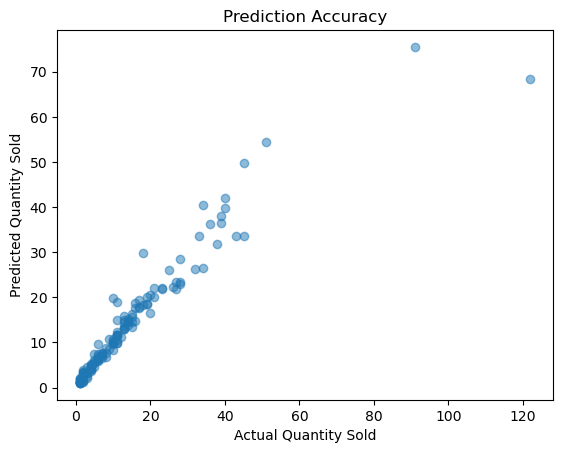

In [34]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Quantity Sold")
plt.ylabel("Predicted Quantity Sold")
plt.title("Prediction Accuracy")
plt.show()


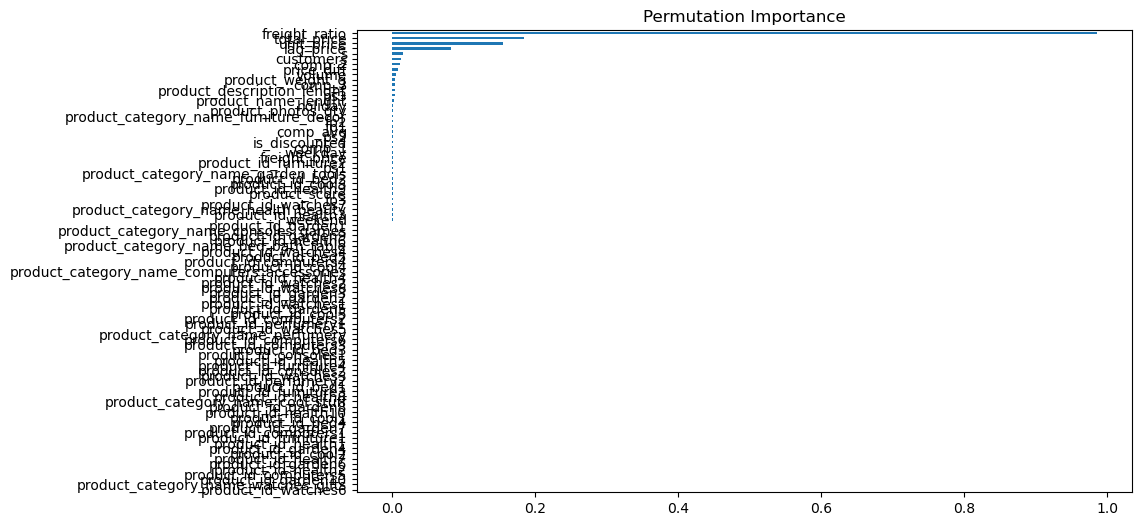

In [35]:
from sklearn.inspection import permutation_importance

# Get feature importances
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Display sorted importances
importances = pd.Series(result.importances_mean, index=X_test.columns)
importances.sort_values(ascending=False).plot(kind='barh', figsize=(10, 6), title="Permutation Importance")
plt.gca().invert_yaxis()
plt.show()


Note: you may need to restart the kernel to use updated packages.


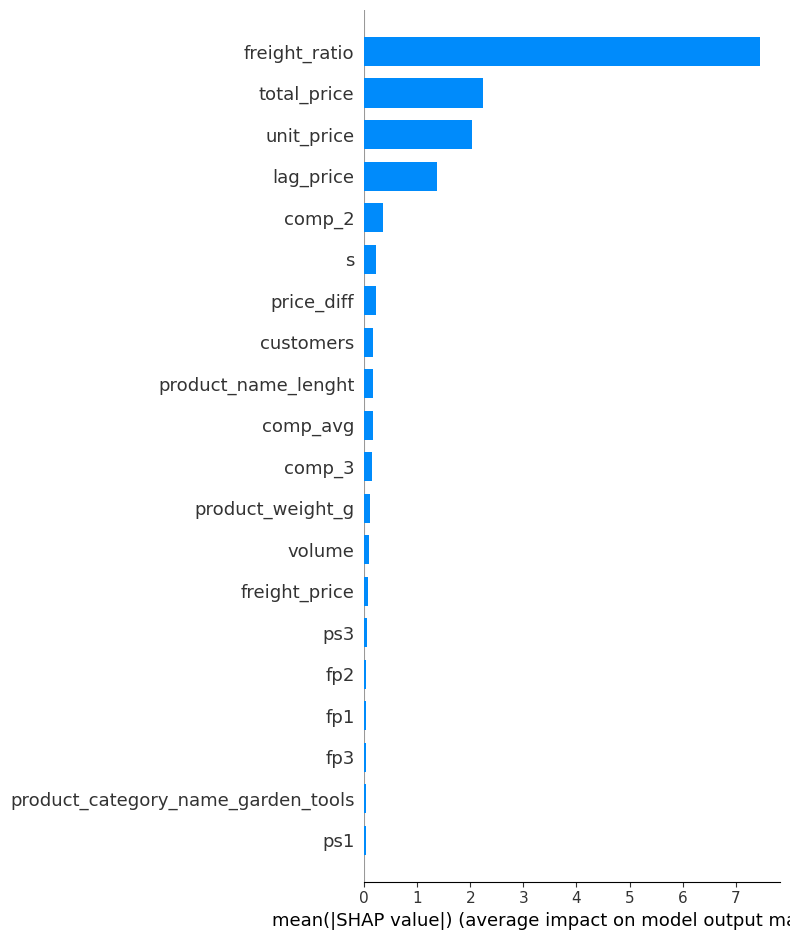

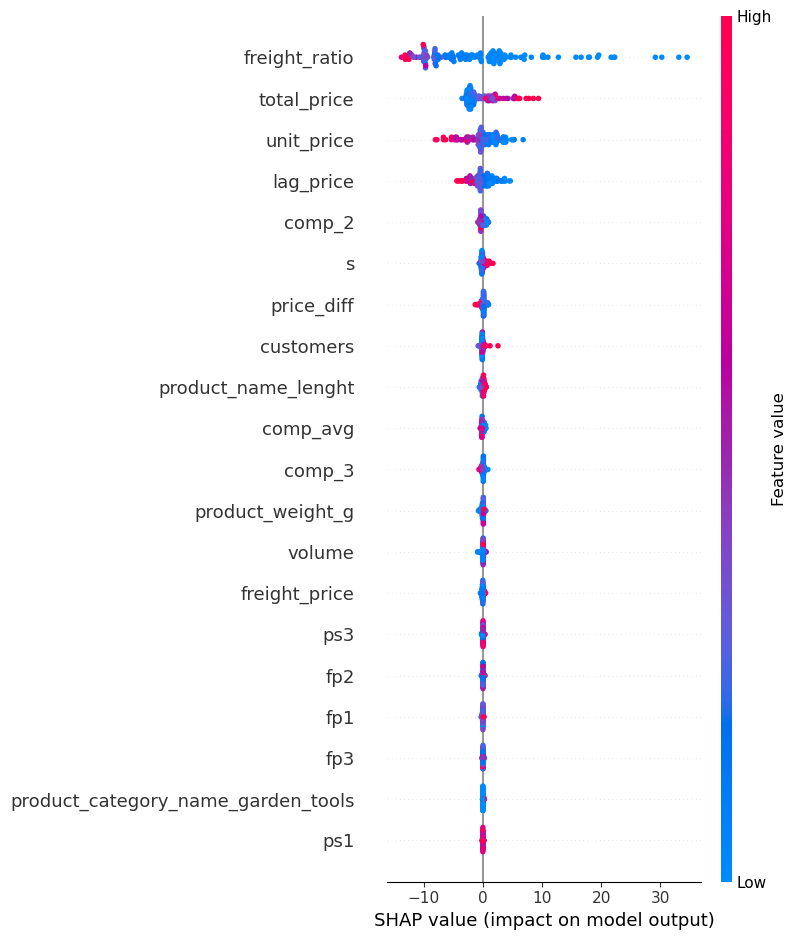

In [36]:
%pip install shap

import shap

# Use TreeExplainer for tree-based models like RandomForest
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)  # beeswarm version


In [37]:
# streamlit_app.py
import streamlit as st
import pandas as pd
import shap
import matplotlib.pyplot as plt

st.title("Sales Prediction Dashboard")

# Upload or select product
product = st.selectbox("Select Product", df['product_id'].unique())

# Show feature importances (SHAP)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

st.subheader("Feature Importance")
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
st.pyplot(bbox_inches='tight')


2025-06-13 16:05:28.782 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-13 16:05:31.310 
  command:

    streamlit run c:\Users\godwi\Downloads\Anconda\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-13 16:05:31.312 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-13 16:05:31.316 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-13 16:05:31.323 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-13 16:05:31.329 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-13 16:05:31.354 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-13 16:05:31.360 Session state d

DeltaGenerator()

<Figure size 800x950 with 0 Axes>

In [38]:
streamlit run streamlit_app.py


SyntaxError: invalid syntax (2482160671.py, line 1)